# Traveling sales'man problem

## Lab1 
- Rozwiazanie pokolei
- Zachlanne zawsze do najblizszego
- Losowo

Rozplatywanie rozwiazania jesli 4 weirzcholki sie przecinaja to jest to udowodnione ze jest to nieoptymalne i trzeba zamienic kolejnosc

Wizualizacja wierzcholki i polaczenia w formie graficznej

tsp lib / ckroA

In [10]:
def load_file(filename):
    with open(filename, 'r') as file:
        data = []
        found_section = False
        for line in file:
            line = line.strip()
            if not found_section:
                if line == "NODE_COORD_SECTION":
                    found_section = True
            else:
                if line == "EOF":
                    break
                parts = line.split()
                if len(parts) == 3:
                    data.append((int(parts[0]), float(parts[1]), float(parts[2])))
        return data

print(load_file("burma14.tsp"))


[(1, 16.47, 96.1), (2, 16.47, 94.44), (3, 20.09, 92.54), (4, 22.39, 93.37), (5, 25.23, 97.24), (6, 22.0, 96.05), (7, 20.47, 97.02), (8, 17.2, 96.29), (9, 16.3, 97.38), (10, 14.05, 98.12), (11, 16.53, 97.38), (12, 21.52, 95.59), (13, 19.41, 97.13), (14, 20.09, 94.55)]


In [11]:
def calculate_distance_unordered(data):
    distance = 0
    order = []
    order.append(data[0])

    for i in range(len(data)):
        if i == 0:
            continue
        dist = ((data[i][1] - order[i-1][1]) ** 2 + (data[i][2] - order[i-1][2]) ** 2) ** 0.5
        order.append(data[i])
        distance += dist
    distance += ((data[0][1] - order[-1][1]) ** 2 + (data[0][2] - order[-1][2]) ** 2) ** 0.5
    return distance, order
print(calculate_distance_unordered(load_file("burma14.tsp")))

(42.48777311762968, [(1, 16.47, 96.1), (2, 16.47, 94.44), (3, 20.09, 92.54), (4, 22.39, 93.37), (5, 25.23, 97.24), (6, 22.0, 96.05), (7, 20.47, 97.02), (8, 17.2, 96.29), (9, 16.3, 97.38), (10, 14.05, 98.12), (11, 16.53, 97.38), (12, 21.52, 95.59), (13, 19.41, 97.13), (14, 20.09, 94.55)])


In [12]:
def calculate_distance_random(data):
    import random
    random.shuffle(data)
    distance = 0
    order = []
    order.append(data[0])

    for i in range(len(data)):
        if i == 0:
            continue
        dist = ((data[i][1] - order[i-1][1]) ** 2 + (data[i][2] - order[i-1][2]) ** 2) ** 0.5
        order.append(data[i])
        distance += dist
    distance += ((data[0][1] - order[-1][1]) ** 2 + (data[0][2] - order[-1][2]) ** 2) ** 0.5
    return distance, order
print(calculate_distance_random(load_file("burma14.tsp")))

(50.99095026011229, [(2, 16.47, 94.44), (10, 14.05, 98.12), (13, 19.41, 97.13), (14, 20.09, 94.55), (3, 20.09, 92.54), (4, 22.39, 93.37), (7, 20.47, 97.02), (12, 21.52, 95.59), (11, 16.53, 97.38), (1, 16.47, 96.1), (5, 25.23, 97.24), (6, 22.0, 96.05), (9, 16.3, 97.38), (8, 17.2, 96.29)])


In [13]:
def dismantle_crossings(order, total_distance):
    improved = True
    improvements = 0
    
    improved_order = order.copy()
    improved_distance = total_distance
    
    while improved:
        improved = False
        
        for i in range(len(improved_order) - 2):
            for j in range(i + 2, len(improved_order) - 1):
                city_i = improved_order[i]
                city_i_next = improved_order[i + 1]
                city_j = improved_order[j]
                city_j_next = improved_order[j + 1]
                
                current_dist = (
                    ((city_i[1] - city_i_next[1])**2 + (city_i[2] - city_i_next[2])**2)**0.5 +
                    ((city_j[1] - city_j_next[1])**2 + (city_j[2] - city_j_next[2])**2)**0.5
                )
                
                new_dist = (
                    ((city_i[1] - city_j[1])**2 + (city_i[2] - city_j[2])**2)**0.5 +
                    ((city_i_next[1] - city_j_next[1])**2 + (city_i_next[2] - city_j_next[2])**2)**0.5
                )
                
                if new_dist < current_dist:
                    improved_order[i+1:j+1] = reversed(improved_order[i+1:j+1])
                    
                    improved_distance = improved_distance - current_dist + new_dist
                    
                    improved = True
                    improvements += 1
                    break
            
            if improved:
                break
    
    return improved_order, improved_distance, improvements

def calculate_distance_greedy(data):
    current_city_idx = 0
    unvisited = list(range(len(data)))
    unvisited.remove(current_city_idx)
    
    order = [data[current_city_idx]]
    total_distance = 0
    
    while unvisited:
        min_dist = float('inf')
        next_city_idx = -1
        
        for j in unvisited:
            dist = ((data[j][1] - data[current_city_idx][1])**2 + (data[j][2] - data[current_city_idx][2])**2)**0.5
            if dist < min_dist:
                min_dist = dist
                next_city_idx = j
        
        current_city_idx = next_city_idx
        unvisited.remove(current_city_idx)
        order.append(data[current_city_idx])
        total_distance += min_dist
    while True:
        improved_order, improved_distance, _ = dismantle_crossings(order, total_distance)
        if total_distance > improved_distance:
            total_distance = improved_distance
            order = improved_order
        else:
            break
    return total_distance, order
print(calculate_distance_greedy(load_file("burma14.tsp")))

(29.660264839355357, [(1, 16.47, 96.1), (10, 14.05, 98.12), (9, 16.3, 97.38), (11, 16.53, 97.38), (8, 17.2, 96.29), (13, 19.41, 97.13), (7, 20.47, 97.02), (6, 22.0, 96.05), (12, 21.52, 95.59), (14, 20.09, 94.55), (2, 16.47, 94.44), (3, 20.09, 92.54), (4, 22.39, 93.37), (5, 25.23, 97.24)])


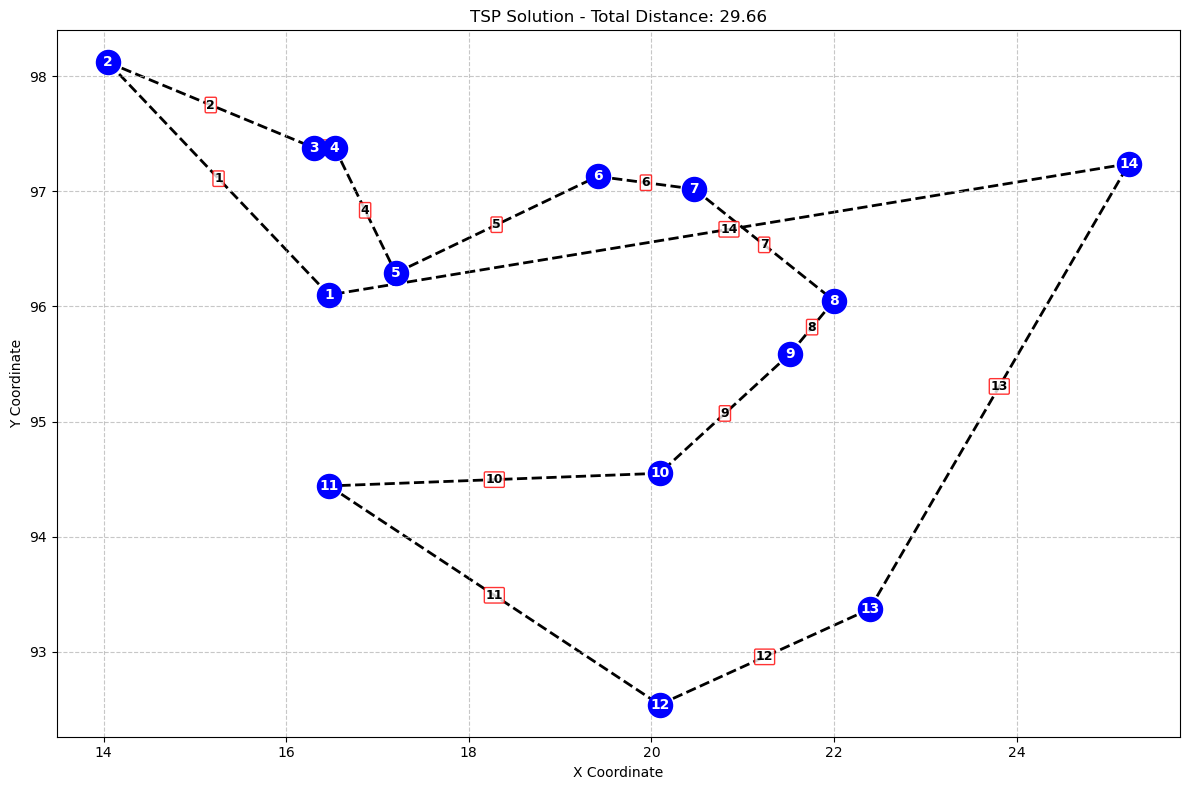

In [14]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LinearSegmentedColormap

def plot_tsp_solution(distance, order):
    plt.figure(figsize=(12, 8))
    
    order_x = [city[1] for city in order]
    order_y = [city[2] for city in order]
    order_x.append(order[0][1])
    order_y.append(order[0][2])

    colors = plt.cm.jet(np.linspace(0, 1, len(order_x)-1))
    
    # Roads
    for i in range(len(order_x)-1):
        plt.plot([order_x[i], order_x[i+1]], 
                 [order_y[i], order_y[i+1]], 
                 '--', 
                 color="black", 
                 linewidth=2,
                 zorder=1)
        mid_x = (order_x[i] + order_x[i+1]) / 2
        mid_y = (order_y[i] + order_y[i+1]) / 2
        
        plt.annotate(f"{i+1}", 
                    (mid_x, mid_y),
                    color='black',
                    fontsize=9,
                    fontweight='bold',
                    bbox=dict(boxstyle="round,pad=0.1", fc="white", alpha=0.8, color = "red"),
                    ha='center', 
                    va='center',
                    zorder=2)
    
    # Cities
    for i, city in enumerate(order):
        plt.scatter(city[1], city[2], c='blue', s=300, zorder=3)
        plt.annotate(f"{i+1}", (city[1], city[2]), 
                    color='white',
                    fontsize=10,
                    fontweight='bold',
                    ha='center', 
                    va='center',
                    zorder=4)
    
    plt.title('TSP Solution - Total Distance: {:.2f}'.format(distance))
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

data = load_file("burma14.tsp")
distance, order = calculate_distance_greedy(data)
plot_tsp_solution(distance, order)